# EDA

경상남도와 합천의 방문객수와 지출액을 전국과 경상남도에 각각 비교하는 그래프



* 데이터: [ 한국 관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do)
* 기간: 2023년 3월 ~2024년 3월 (마스크 해재 2023년 3월)




1.   전국 vs. 경상남도 방문자 수
2.   경상남도 vs. 경상남도 합천 방문자수
3.   전국 vs. 경상남도 지출액
4.   경상남도 vs. 경상남도 합천 지출액
5.   2023년도 시군별 문화관광예산금액,문화관광예산비율,1인당문화관광예산금액 (8,11,13)
6.  2016~2023 합천군문화관광예산금액,문화관광예산비율,1인당문화관광예산금액 (8,11,13)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요한 라이브러리 다운로드
import pandas as pd
import geopandas as gpd
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


In [ ]:
fe = fm.FontEntry(fname=r'/content/drive/MyDrive/LINESeedKR-Rg.ttf', name='Line') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.family': 'Line'}) #폰트설정


In [ ]:
# 경상남도와 합천 데이터

# Visitor1은 전국 방문자
# Comp1은 전국 지출액

# Visitor2은 경상남도 방문자
# Comp2은 경상남도 관광소비 내국인
# Comp3은 경상남도 관광소비 외국인

# Visitor3은 경상남도 합천 방문자
# Comp4은 경상남도 합천 관광소비 내국인
# Comp5은 경상남도 합천 관광소비 외국인


In [ ]:
# 정확한 경로를 사용하여 CSV 파일 로드
file_path = '/content/drive/MyDrive/EDA/전국_방문자수.csv의 사본'
Visitor1 = pd.read_csv(file_path, encoding='euc-kr')

# 방문자수를 억 단위로 변환
Visitor1['방문자수'] = Visitor1['방문자수'] / 1e8

# 그래프 크기 설정
plt.figure(figsize=(16, 9))

# 새로운 색상 팔레트를 사용하여 막대 그래프 생성
sns.barplot(x='시도명', y='방문자수', data=Visitor1, palette='coolwarm')

# x축 레이블 회전 및 오른쪽 정렬
plt.xticks(rotation=45, ha='right', fontsize=12)

# y축 눈금 설정
plt.yticks(np.arange(0, 8, 1), fontsize=12)

# 라벨과 제목을 굵게 설정
plt.xlabel('시도명', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (억명)', fontsize=20, fontweight='bold')
plt.title('전국 방문자수', fontsize=25, fontweight='bold')

# y축에 그리드 라인 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/EDA/전국_방문자수.csv의 사본'

<ipython-input-47-033f6da8b1c8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='시도명', y='관광지출액', data=Comp1, palette='PuBuGn')


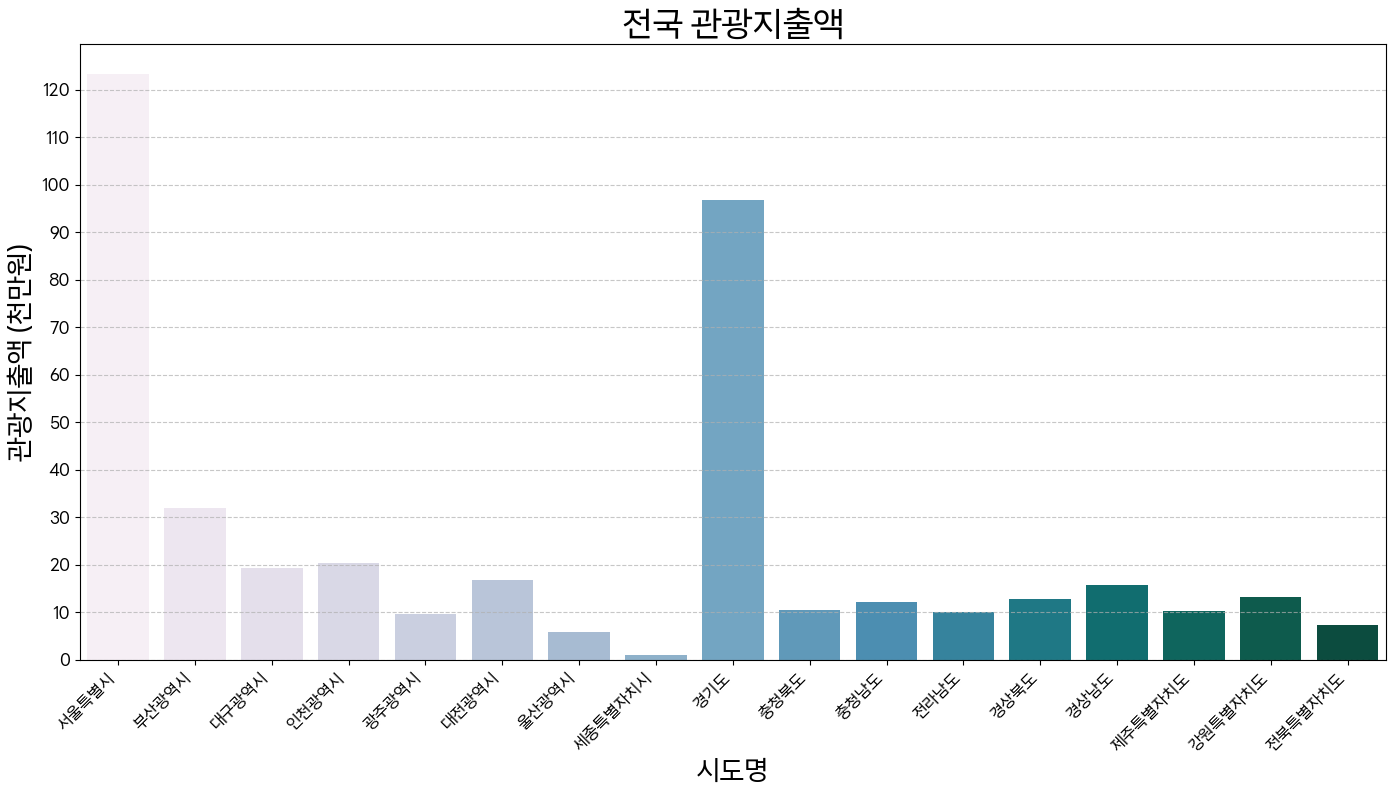

In [ ]:
# 정확한 경로를 사용하여 CSV 파일 로드
file_path = '/content/drive/MyDrive/EDA/전국_관광지출액.csv의 사본'
Comp1 = pd.read_csv(file_path, encoding='euc-kr')


# Set the figure size
plt.figure(figsize=(14, 8))

# Convert 방문자수 to hundreds of millions for better scaling
Comp1['관광지출액'] = [x / 1e8 for x in Comp1['관광지출액']]

# Create barplot
sns.barplot(x='시도명', y='관광지출액', data=Comp1, palette='PuBuGn')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# y축 눈금 설정
plt.yticks(np.arange(0, 130, 10), fontsize=12)

# Set labels and title with bold font and larger size
plt.xlabel('시도명', fontsize=20, fontweight='bold')
plt.ylabel('관광지출액 (천만원)', fontsize=20, fontweight='bold')
plt.title('전국 관광지출액', fontsize=25, fontweight='bold')

# y축에 그리드 라인 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

##  경상남도 방문자


In [ ]:
# Visitor2은 경상남도 방문자
Visitor2 = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_방문객.csv의 사본',encoding='euc-kr')
Visitor2 = pd.DataFrame(Visitor2)
print(Visitor2)

      기준년월        방문자수    전년동월방문자수  방문자수증감률
0   202303  13761143.0  11540998.0     19.2
1   202304  12455848.0  11738246.0      6.1
2   202305  13514705.0  13202213.0      2.4
3   202306  12311514.0  11873464.0      3.7
4   202307  13275771.0  13934455.0     -4.7
5   202308  14035716.0  14262148.0     -1.6
6   202309  14560772.0  13591685.0      7.1
7   202310  14198291.0  14027482.0      1.2
8   202311  11913301.0  11917885.0     -0.0
9   202312  12024793.0  11502504.0      4.5
10  202401  11947715.0  13464355.0    -11.3
11  202402  13432639.0  10727371.0     25.2
12  202403  14131728.0  13761143.0      2.7


In [ ]:
data = {
    '기준년월': ['202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312', '202401', '202402', '202403'],
    '방문자수': [13761143.0, 12455848.0, 13514705.0, 12311514.0, 13275771.0, 14035716.0, 14560772.0, 14198291.0, 11913301.0, 12024793.0, 11947715.0, 13432639.0, 14131728.0],
    '전년동월방문자수': [11540998.0, 11738246.0, 13202213.0, 11873464.0, 13934455.0, 14262148.0, 13591685.0, 14027482.0, 11917885.0, 11502504.0, 13464355.0, 10727371.0, 13761143.0],
    '방문자수증감률': [19.2, 6.1, 2.4, 3.7, -4.7, -1.6, 7.1, 1.2, -0.0, 4.5, -11.3, 25.2, 2.7]
}


In [ ]:
# Convert the data to a DataFrame
Visitor2 = pd.DataFrame(data)


# Convert '기준년월' to datetime format
Visitor2['기준년월'] = pd.to_datetime(Visitor2['기준년월'], format='%Y%m')


# Convert 방문자수 to hundreds of millions for better scaling
Visitor2['방문자수'] = [x / 1e6 for x in Visitor2['방문자수']]


In [ ]:
Visitor2

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-03-01,13.761143,11540998.0,19.2
1,2023-04-01,12.455848,11738246.0,6.1
2,2023-05-01,13.514705,13202213.0,2.4
3,2023-06-01,12.311514,11873464.0,3.7
4,2023-07-01,13.275771,13934455.0,-4.7
5,2023-08-01,14.035716,14262148.0,-1.6
6,2023-09-01,14.560772,13591685.0,7.1
7,2023-10-01,14.198291,14027482.0,1.2
8,2023-11-01,11.913301,11917885.0,-0.0
9,2023-12-01,12.024793,11502504.0,4.5


<ipython-input-78-b7115eb15c34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=Visitor2['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor2, palette='PuBuGn', ax=ax, zorder=3)


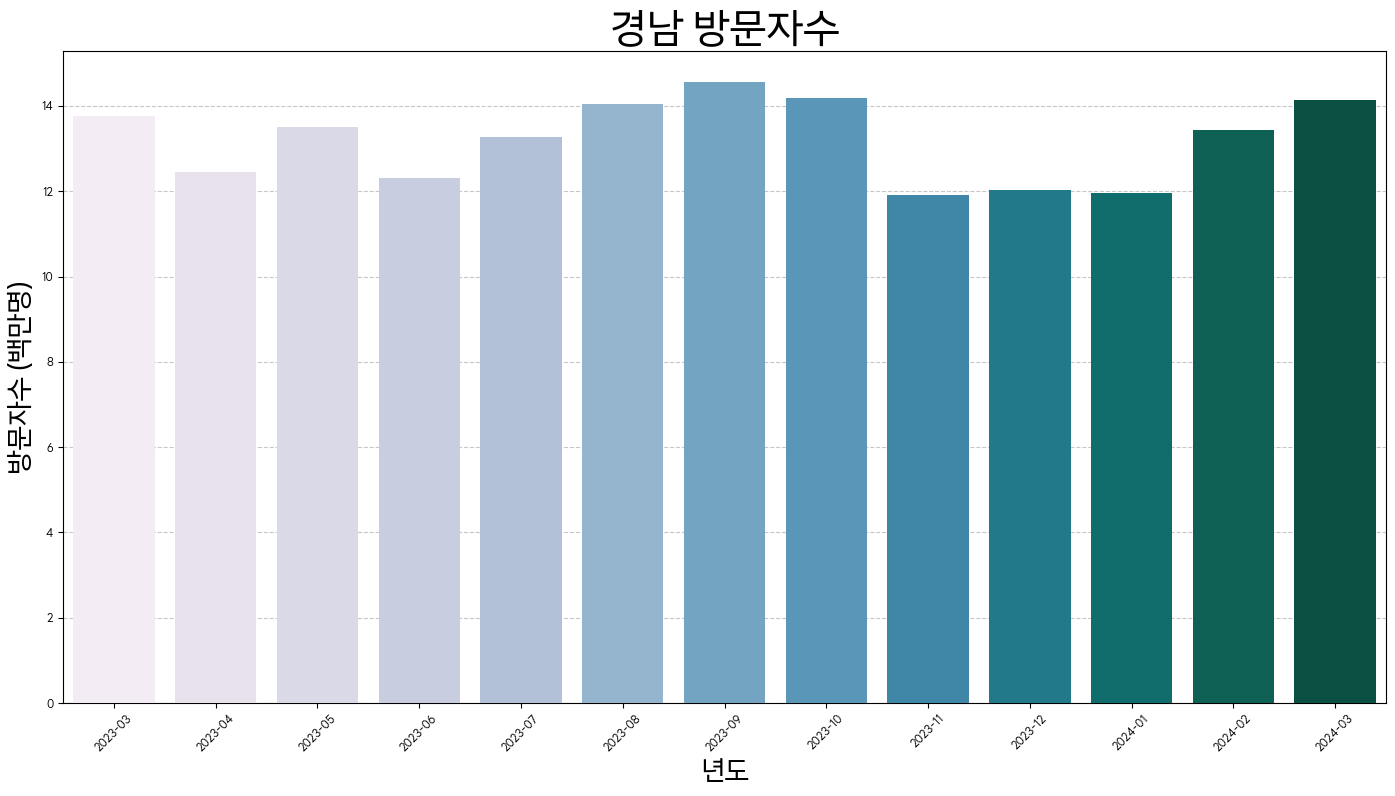

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Create barplot with zorder to ensure bars are in front of the grid lines
bars = sns.barplot(x=Visitor2['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor2, palette='PuBuGn', ax=ax, zorder=3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (백만명)', fontsize=20, fontweight='bold', zorder=4)
plt.title('경남 방문자수', fontsize=30, fontweight='bold')

# Add grid lines with zorder behind bars
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-17-5557bc38f689>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='기준년월', y='방문자수증감률', data=df, palette='coolwarm', ax=ax, zorder=3)


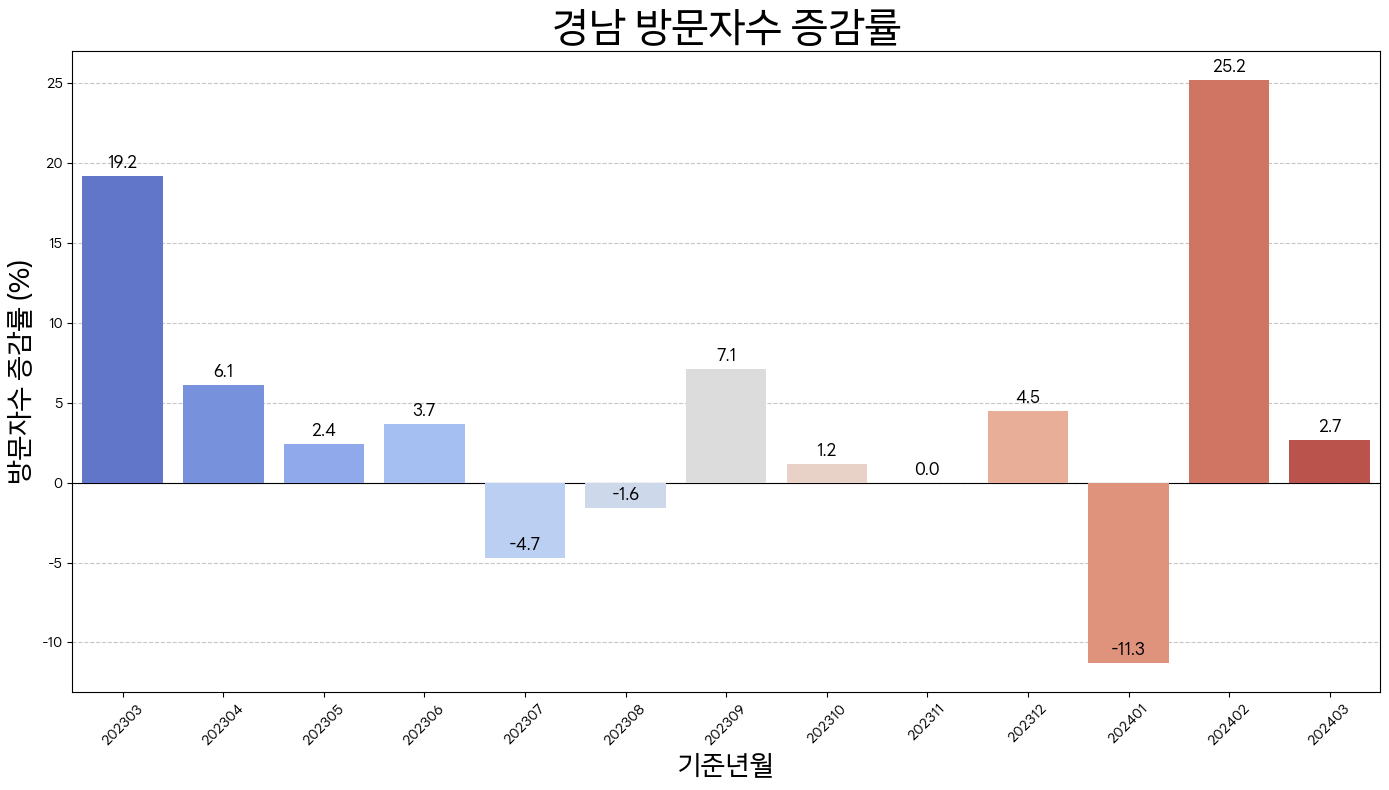

In [ ]:
# 데이터 생성
data = {
    '기준년월': ['202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310', '202311', '202312', '202401', '202402', '202403'],
    '방문자수': [13761143.0, 12455848.0, 13514705.0, 12311514.0, 13275771.0, 14035716.0, 14560772.0, 14198291.0, 11913301.0, 12024793.0, 11947715.0, 13432639.0, 14131728.0],
    '전년동월방문자수': [11540998.0, 11738246.0, 13202213.0, 11873464.0, 13934455.0, 14262148.0, 13591685.0, 14027482.0, 11917885.0, 11502504.0, 13464355.0, 10727371.0, 13761143.0],
    '방문자수증감률': [19.2, 6.1, 2.4, 3.7, -4.7, -1.6, 7.1, 1.2, -0.0, 4.5, -11.3, 25.2, 2.7]
}

df = pd.DataFrame(data)

# Set the figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Create barplot for 방문자수증감률 with a diverging palette to highlight positive and negative values
bars = sns.barplot(x='기준년월', y='방문자수증감률', data=df, palette='coolwarm', ax=ax, zorder=3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.8, zorder=2)

# Set labels and title with bold font and larger size
plt.xlabel('기준년월', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 증감률 (%)', fontsize=20, fontweight='bold')
plt.title('경남 방문자수 증감률', fontsize=30, fontweight='bold')

# Add gridlines with zorder behind bars
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Add value labels on the bars
for p in bars.patches:
    value = format(p.get_height(), '.1f')
    if not value == 'nan':  # Avoid displaying labels for missing data
        bars.annotate(value,
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9),
                      textcoords='offset points',
                      fontsize=12, zorder=4)

# Display the plot
plt.tight_layout()
plt.show()

## 경상남도 관광소비 내국인


In [ ]:
# Comp2은 경상남도 관광소비 내국인
Comp2 = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_전국_대비_관광소비_추이_내국인.csv의 사본',encoding='euc-kr')

In [ ]:
# 기준년월을 월별로 나눔
Comp2['기준년월'] = pd.to_datetime(Comp2['기준연월'], format='%Y%m')
Comp2

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월
0,202303,경상남도,130919,3478043,3.8,2023-03-01
1,202304,경상남도,139724,3619532,3.9,2023-04-01
2,202305,경상남도,142154,3803919,3.7,2023-05-01
3,202306,경상남도,133149,3569349,3.7,2023-06-01
4,202307,경상남도,134376,3589248,3.7,2023-07-01
5,202308,경상남도,134135,3506755,3.8,2023-08-01
6,202309,경상남도,131610,3456150,3.8,2023-09-01
7,202310,경상남도,142735,3672830,3.9,2023-10-01
8,202311,경상남도,125443,3352999,3.7,2023-11-01
9,202312,경상남도,129557,3565655,3.6,2023-12-01


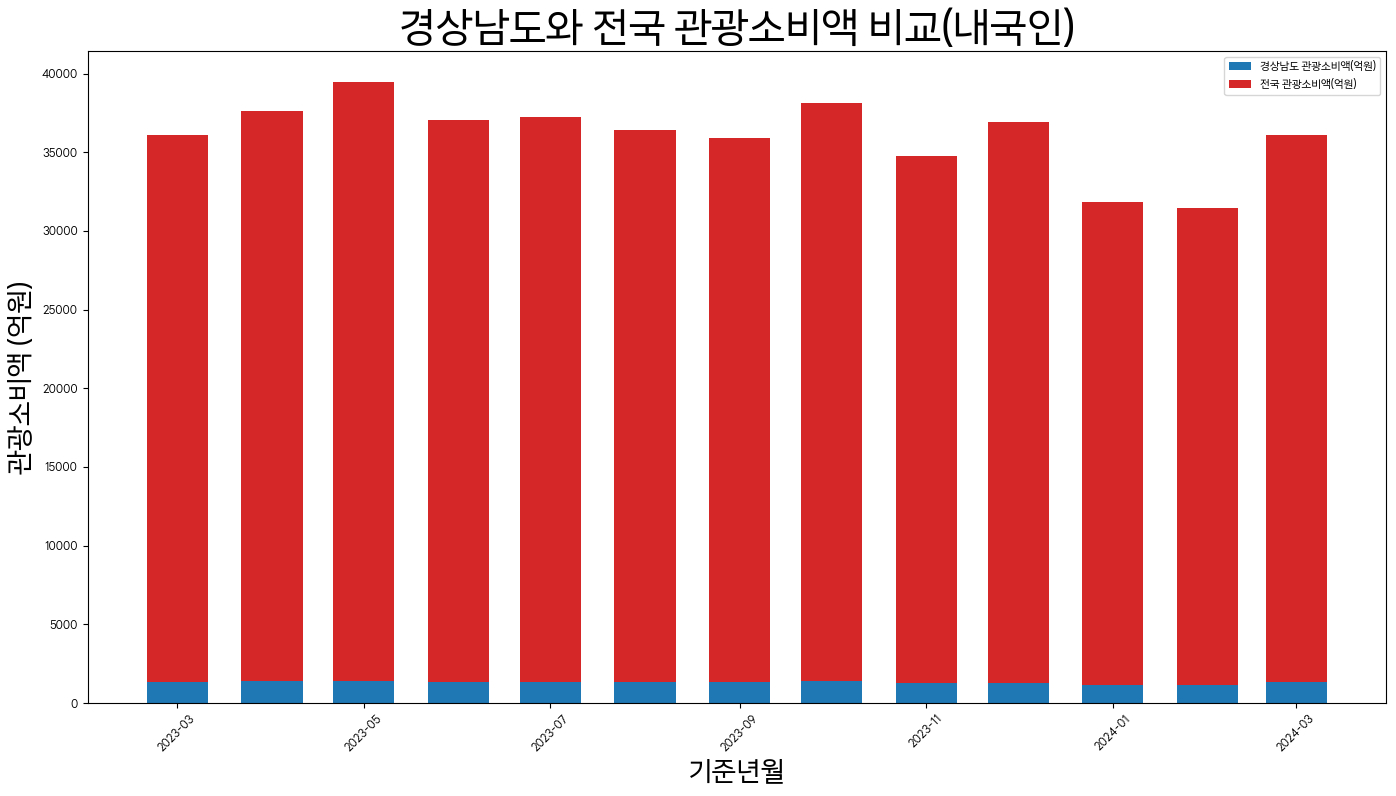

In [ ]:
# 관광소비액(백만원)을 억원 단위로 변환
Comp2['경상남도_관광소비액(억원)'] = [x / 100 for x in Comp2['관광소비액(백만원)']]
Comp2['전국_관광소비액(억원)'] = [x / 100 for x in Comp2['전국 관광소비액(백만원)']]

# Set the figure size
plt.figure(figsize=(14, 8))

# Create stacked bar plot with thicker bars
bar_width = 20  # Increase bar width for thicker bars
index = pd.to_datetime(Comp2['기준년월'])

p1 = plt.bar(index, Comp2['경상남도_관광소비액(억원)'], width=bar_width, label='경상남도 관광소비액(억원)', color='tab:blue')
p2 = plt.bar(index, Comp2['전국_관광소비액(억원)'], width=bar_width, bottom=Comp2['경상남도_관광소비액(억원)'], label='전국 관광소비액(억원)', color='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('기준년월', fontsize=20, fontweight='bold')
plt.ylabel('관광소비액 (억원)', fontsize=20, fontweight='bold')
plt.title('경상남도와 전국 관광소비액 비교(내국인)', fontsize=30, fontweight='bold')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## 경상남도 관광소비 외국인


In [ ]:
# Comp3은 경상남도 관광소비 외국인
Comp3 = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_전국_대비_관광소비_추이_외국인.csv의 사본',encoding='euc-kr')

In [ ]:
# 기준년월을 월별로 나눔
Comp3['기준년월'] = pd.to_datetime(Comp3['기준연월'], format='%Y%m')
Comp3

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월
0,202303,경상남도,2869.0,513251.0,0.6,2023-03-01
1,202304,경상남도,3279.0,662625.0,0.5,2023-04-01
2,202305,경상남도,3688.0,685044.0,0.5,2023-05-01
3,202306,경상남도,3013.0,692638.0,0.4,2023-06-01
4,202307,경상남도,3560.0,718822.0,0.5,2023-07-01
5,202308,경상남도,2984.0,810705.0,0.4,2023-08-01
6,202309,경상남도,4079.0,820926.0,0.5,2023-09-01
7,202310,경상남도,4563.0,943138.0,0.5,2023-10-01
8,202311,경상남도,3813.0,754543.0,0.5,2023-11-01
9,202312,경상남도,3276.0,749427.0,0.4,2023-12-01


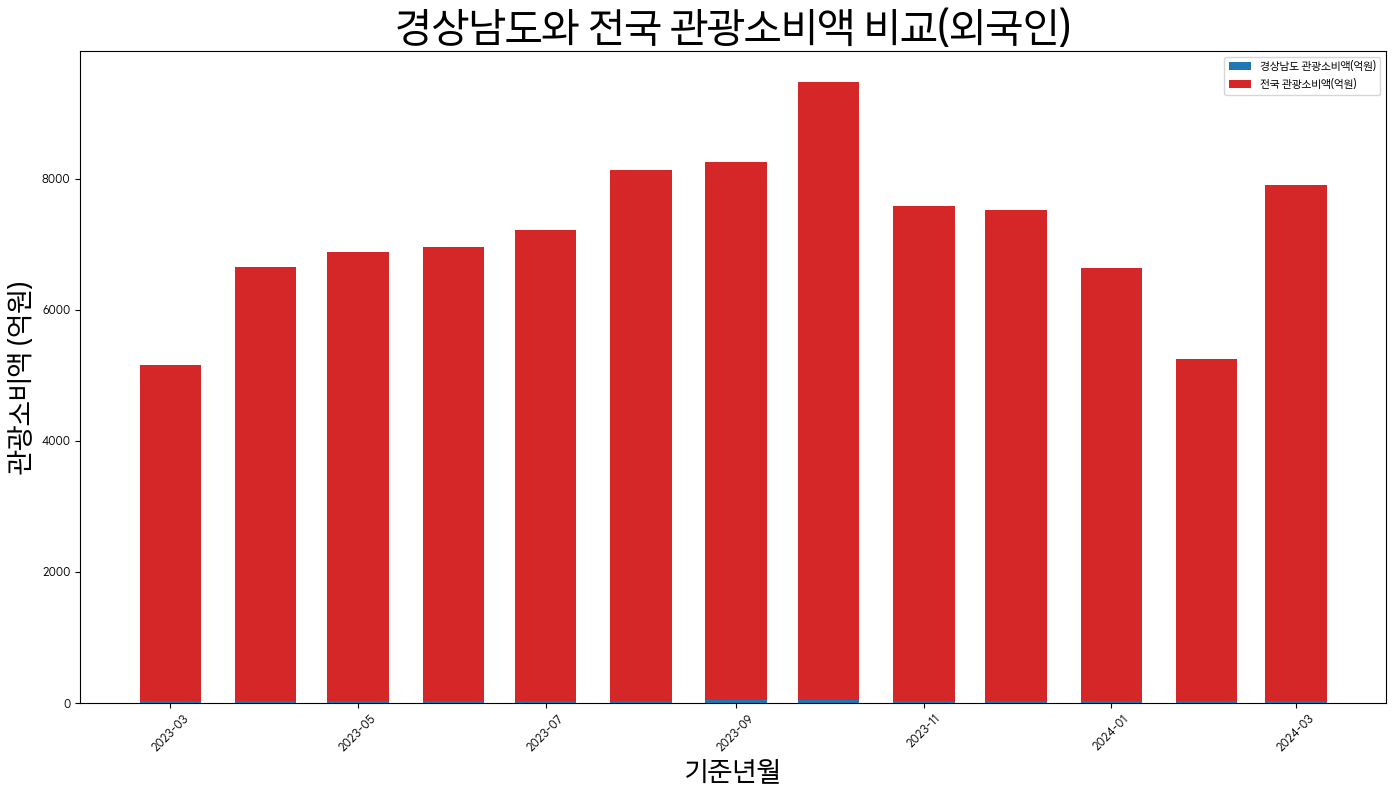

In [ ]:
# Set the figure size
fig, ax = plt.subplots(figsize=(14, 8))

# Create stacked bar plot with thicker bars
bar_width = 20  # Increase bar width for thicker bars
index = pd.to_datetime(Comp3['기준년월'])

p1 = plt.bar(index, Comp3['경상남도_관광소비액(억원)'], width=bar_width, label='경상남도 관광소비액(억원)', color='tab:blue')
p2 = plt.bar(index, Comp3['전국_관광소비액(억원)'], width=bar_width, bottom=Comp3['경상남도_관광소비액(억원)'], label='전국 관광소비액(억원)', color='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('기준년월', fontsize=20, fontweight='bold')
plt.ylabel('관광소비액 (억원)', fontsize=20, fontweight='bold')
plt.title('경상남도와 전국 관광소비액 비교(외국인)', fontsize=30, fontweight='bold')

# Add legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## 경상남도 합천 방문자

In [ ]:
# Visitor3은 경상남도 합천 방문자

Visitor3 = pd.read_csv('/content/drive/MyDrive/Data/합천_방문자_수_추이.csv',encoding='euc-kr')
Visitor3 = pd.DataFrame(Visitor3)
print(Visitor3)

      기준년월      방문자수  전년동월방문자수  방문자수증감률
0   202303  529540.0  431926.0     22.6
1   202304  680506.0  620954.0      9.6
2   202305  726455.0  832907.0    -12.8
3   202306  554239.0  530180.0      4.5
4   202307  523645.0  567426.0     -7.7
5   202308  557382.0  625746.0    -10.9
6   202309  693127.0  692193.0      0.1
7   202310  790513.0  833353.0     -5.1
8   202311  514694.0  590825.0    -12.9
9   202312  404944.0  420408.0     -3.7
10  202401  394687.0  557764.0    -29.2
11  202402  538270.0  391027.0     37.6
12  202403  512358.0  529540.0     -3.2


In [ ]:
# 기준년월을 월별로 나눔
Visitor3['기준년월'] = pd.to_datetime(Visitor3['기준년월'], format='%Y%m')
Visitor3

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2023-03-01,529540.0,431926.0,22.6
1,2023-04-01,680506.0,620954.0,9.6
2,2023-05-01,726455.0,832907.0,-12.8
3,2023-06-01,554239.0,530180.0,4.5
4,2023-07-01,523645.0,567426.0,-7.7
5,2023-08-01,557382.0,625746.0,-10.9
6,2023-09-01,693127.0,692193.0,0.1
7,2023-10-01,790513.0,833353.0,-5.1
8,2023-11-01,514694.0,590825.0,-12.9
9,2023-12-01,404944.0,420408.0,-3.7


In [ ]:
Visitor3['합천_관광객 (백만명)'] = [x / 10e5 for x in Visitor3['방문자수']]

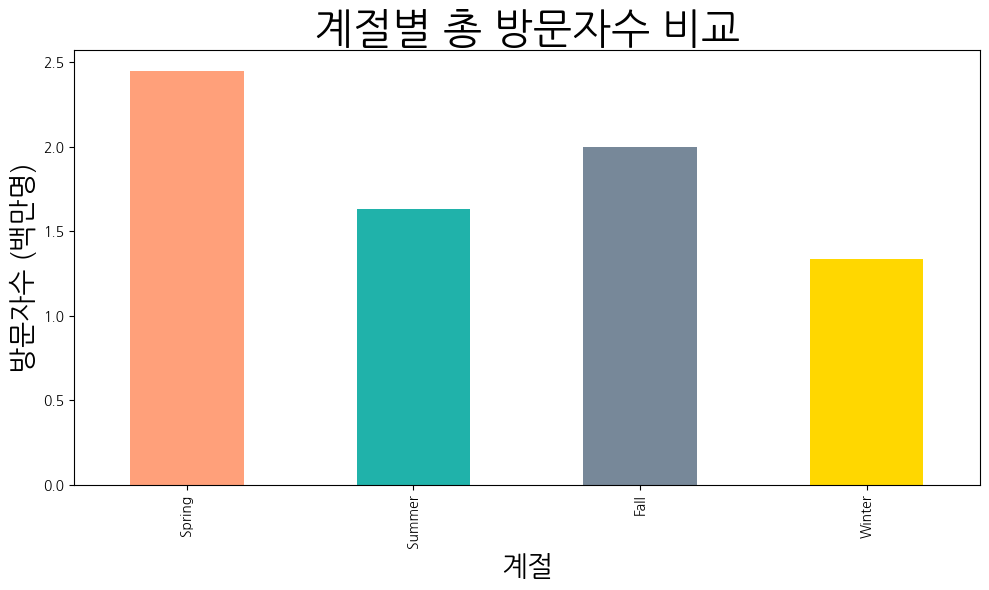

In [ ]:
# Define the seasons
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11],
    'Winter': [12, 1, 2]
}

# Function to get the season name
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season

# Add a new column for the season
Visitor3['Season'] = Visitor3['기준년월'].dt.month.apply(get_season)

# Group by season and sum the 방문자수
seasonal_data = Visitor3.groupby('Season')['합천_관광객 (백만명)'].sum().reindex(['Spring', 'Summer', 'Fall', 'Winter'])

# Plotting
plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='bar', color=['#FFA07A', '#20B2AA', '#778899', '#FFD700'], legend=None)

# Set labels and title with bold font and larger size
plt.xlabel('계절', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (백만명)', fontsize=20, fontweight='bold')
plt.title('계절별 총 방문자수 비교', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

<ipython-input-62-08e525c8f2ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Visitor3['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor3, palette='viridis')


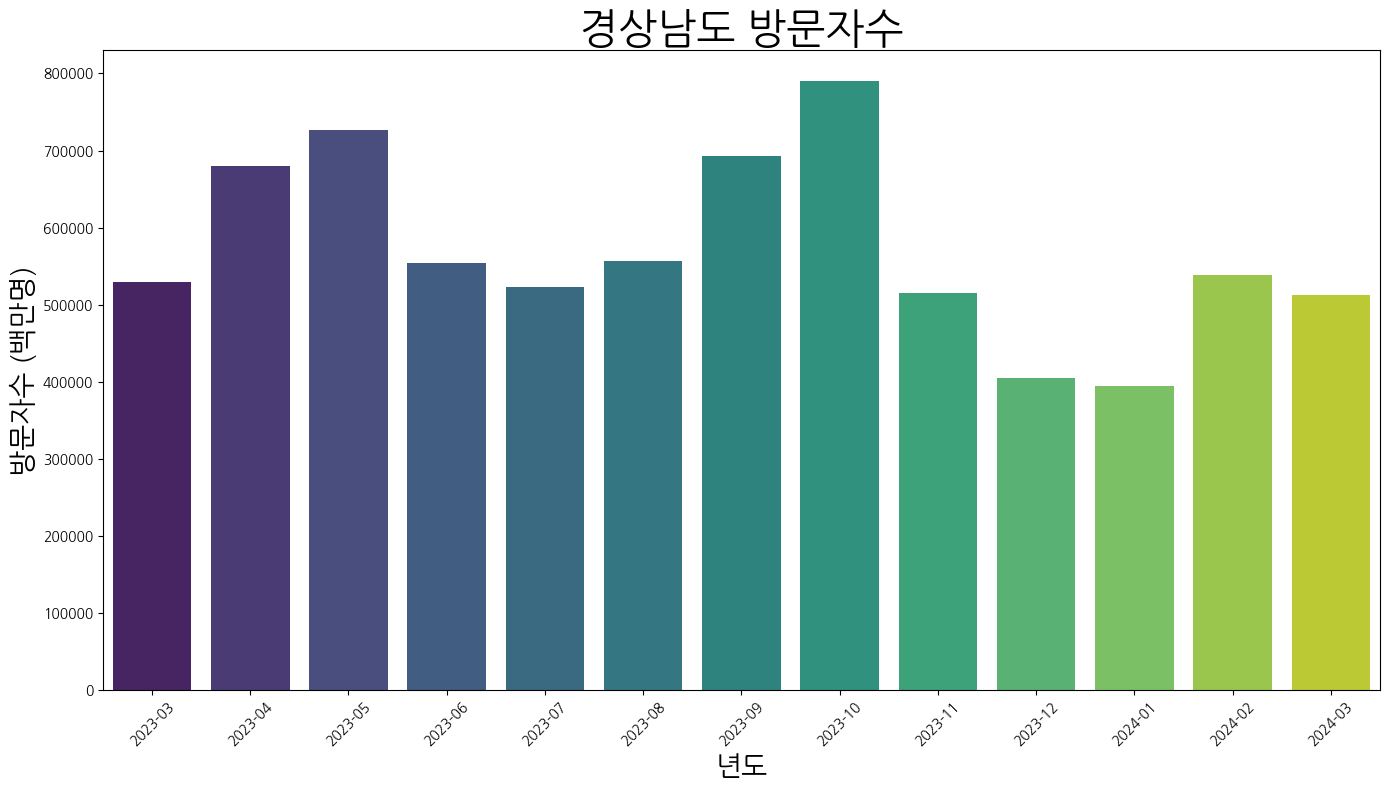

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create barplot
sns.barplot(x=Visitor3['기준년월'].dt.strftime('%Y-%m'), y='방문자수', data=Visitor3, palette='viridis')

plt.xticks(rotation=45)

# Set labels and title with bold font and larger size
plt.xlabel('년도', fontsize=20, fontweight='bold')
plt.ylabel('방문자수 (백만명)', fontsize=20, fontweight='bold')
plt.title('경상남도 합천 방문자수', fontsize=30, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

## 경상남도 합천 관광소비 내국인

In [ ]:
# Comp4은 경상남도 합천 관광소비 내국인

Comp4 = pd.read_csv('/content/drive/MyDrive/Data/내국인_합천_관광소비_수_추이.csv',encoding='euc-kr')
Comp4 = pd.DataFrame(Comp4)
print(Comp4)


      기준년월  소비금 (백만원)  전국 소비금 (백만원)
0   202303       1276       3478043
1   202304       1696       3619532
2   202305       1668       3803919
3   202306       1378       3569349
4   202307       1409       3589248
5   202308       1443       3506755
6   202309       1533       3456150
7   202310       1874       3672830
8   202311       1297       3352999
9   202312        949       3565655
10  202401        871       3070452
11  202402        944       3028104
12  202403       1293       3480463


In [ ]:
# 기준년월을 월별로 나눔
Comp4['기준년월'] = pd.to_datetime(Comp4['기준년월'], format='%Y%m')
Comp4

,기준년월,소비금 (백만원),전국 소비금 (백만원)
0,2023-03-01,1276,3478043
1,2023-04-01,1696,3619532
2,2023-05-01,1668,3803919
3,2023-06-01,1378,3569349
4,2023-07-01,1409,3589248
5,2023-08-01,1443,3506755
6,2023-09-01,1533,3456150
7,2023-10-01,1874,3672830
8,2023-11-01,1297,3352999
9,2023-12-01,949,3565655


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp4['전국_관광소비액(억원)'] = [x / 100 for x in Comp4['전국 소비금 (백만원)']]

<Figure size 1400x800 with 0 Axes>

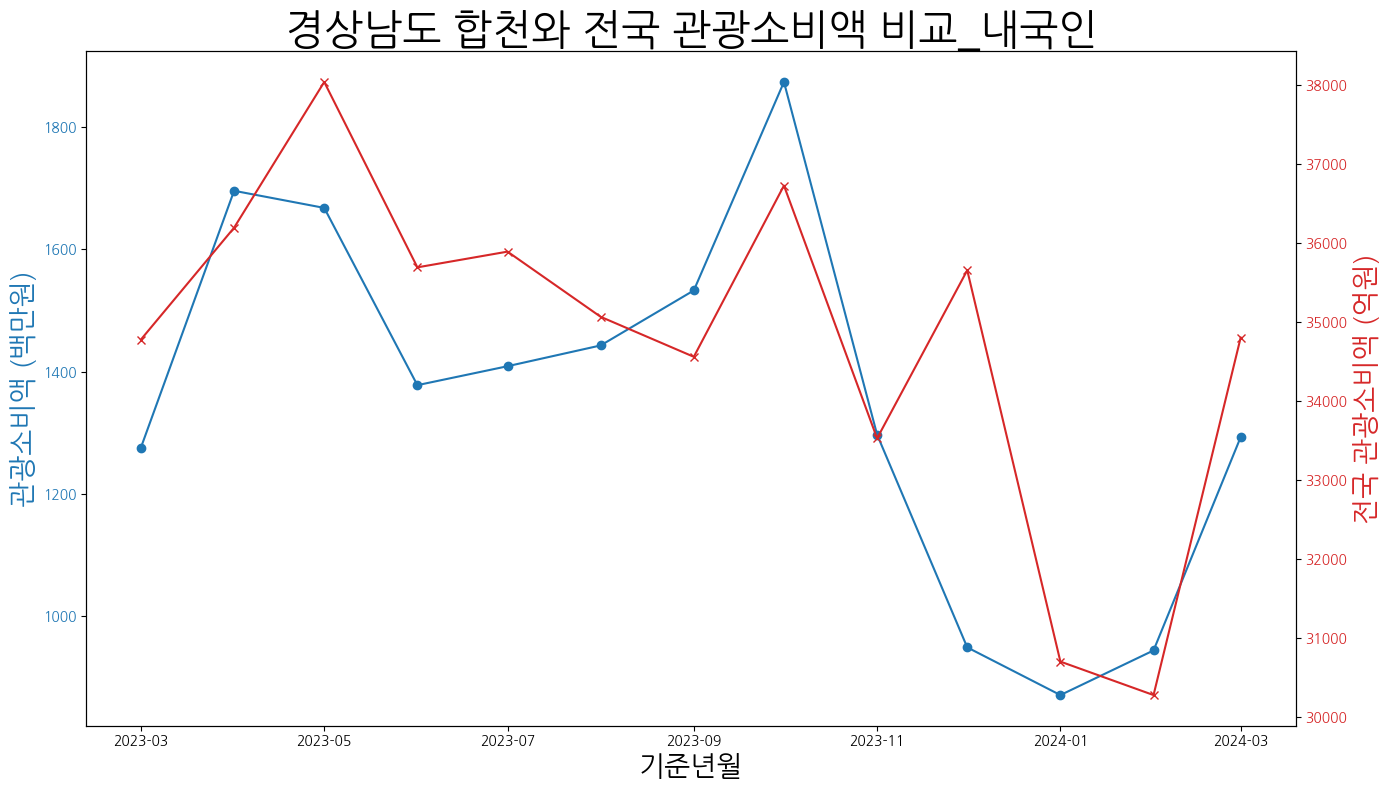

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp4['기준년월'], Comp4['소비금 (백만원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp4['기준년월'], Comp4['전국_관광소비액(억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도 합천와 전국 관광소비액 비교_내국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()

## 경상남도 합천 관광소비 외국인


In [ ]:
# Comp5은 경상남도 합천 관광소비 외국인

Comp5 = pd.read_csv('/content/drive/MyDrive/Data/외국인_합천_관광소비_수_추이.csv',encoding='euc-kr')
Comp5 = pd.DataFrame(Comp5)
print(Comp5)

      기준년월  소비금 (백만원)  전국 소비금 (백만원)
0   202303          1        513251
1   202304          5        662625
2   202305          6        685044
3   202306          5        692638
4   202307          5        718822
5   202308          5        810705
6   202309          5        820926
7   202310         11        943138
8   202311          7        754543
9   202312          2        749427
10  202401          2        660332
11  202402          3        523129
12  202403          4        786888


In [ ]:
# 기준년월을 월별로 나눔
Comp5['기준년월'] = pd.to_datetime(Comp5['기준년월'], format='%Y%m')
Comp5

,기준년월,소비금 (백만원),전국 소비금 (백만원)
0,2023-03-01,1,513251
1,2023-04-01,5,662625
2,2023-05-01,6,685044
3,2023-06-01,5,692638
4,2023-07-01,5,718822
5,2023-08-01,5,810705
6,2023-09-01,5,820926
7,2023-10-01,11,943138
8,2023-11-01,7,754543
9,2023-12-01,2,749427


In [ ]:
# Convert 방문자수 to hundreds of millions for better scaling
Comp5['전국_관광소비액(억원)'] = [x / 100 for x in Comp5['전국 소비금 (백만원)']]

<Figure size 1400x800 with 0 Axes>

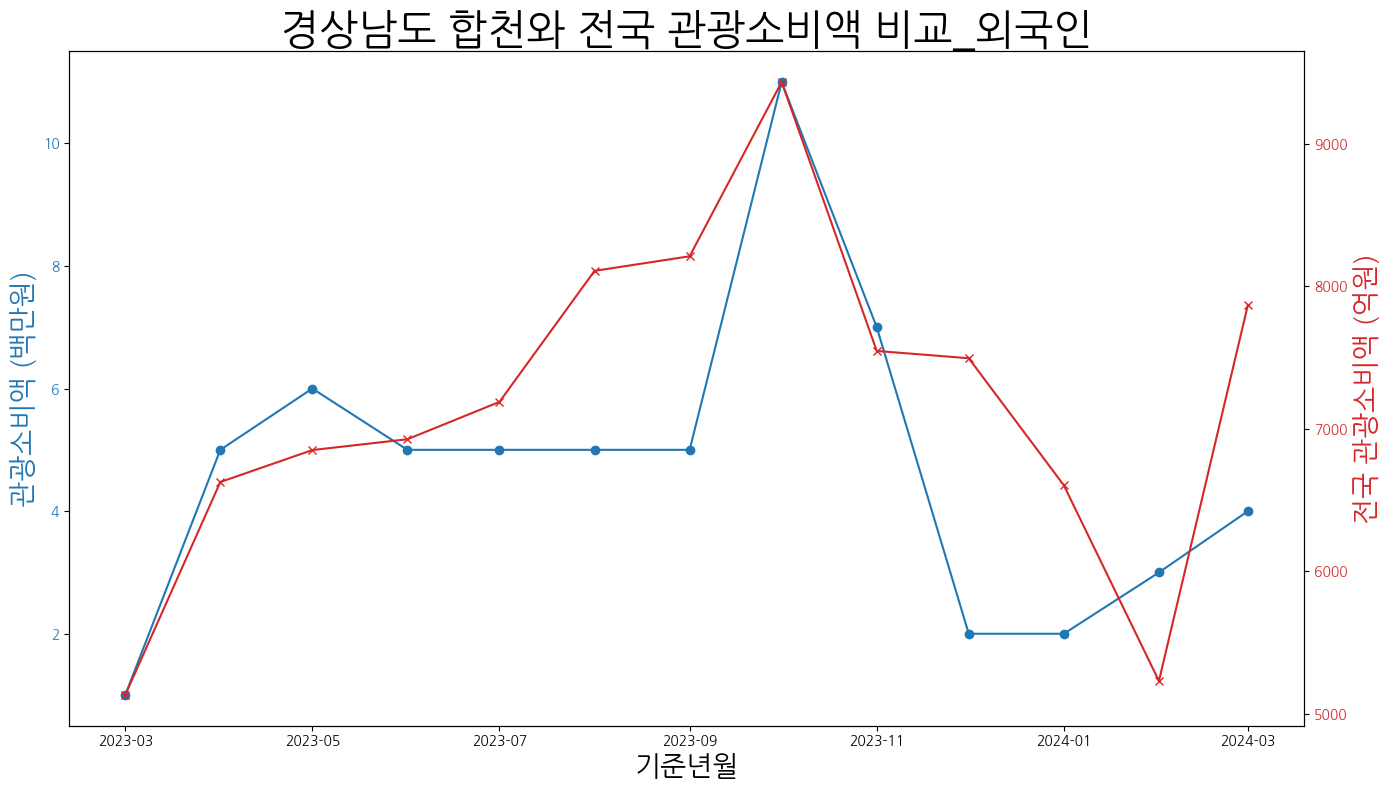

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting 관광소비액(백만원) with ax1
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp5['기준년월'], Comp5['소비금 (백만원)'], color='tab:blue', label='경상남도_관광소비액(억원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 전국 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_ylabel('전국 관광소비액 (억원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp5['기준년월'], Comp5['전국_관광소비액(억원)'], color='tab:red', label='전국_관광소비액(억원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도 합천와 전국 관광소비액 비교_외국인', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()

## 합천 내국인과 내국인 지출액 비교


<Figure size 1400x800 with 0 Axes>

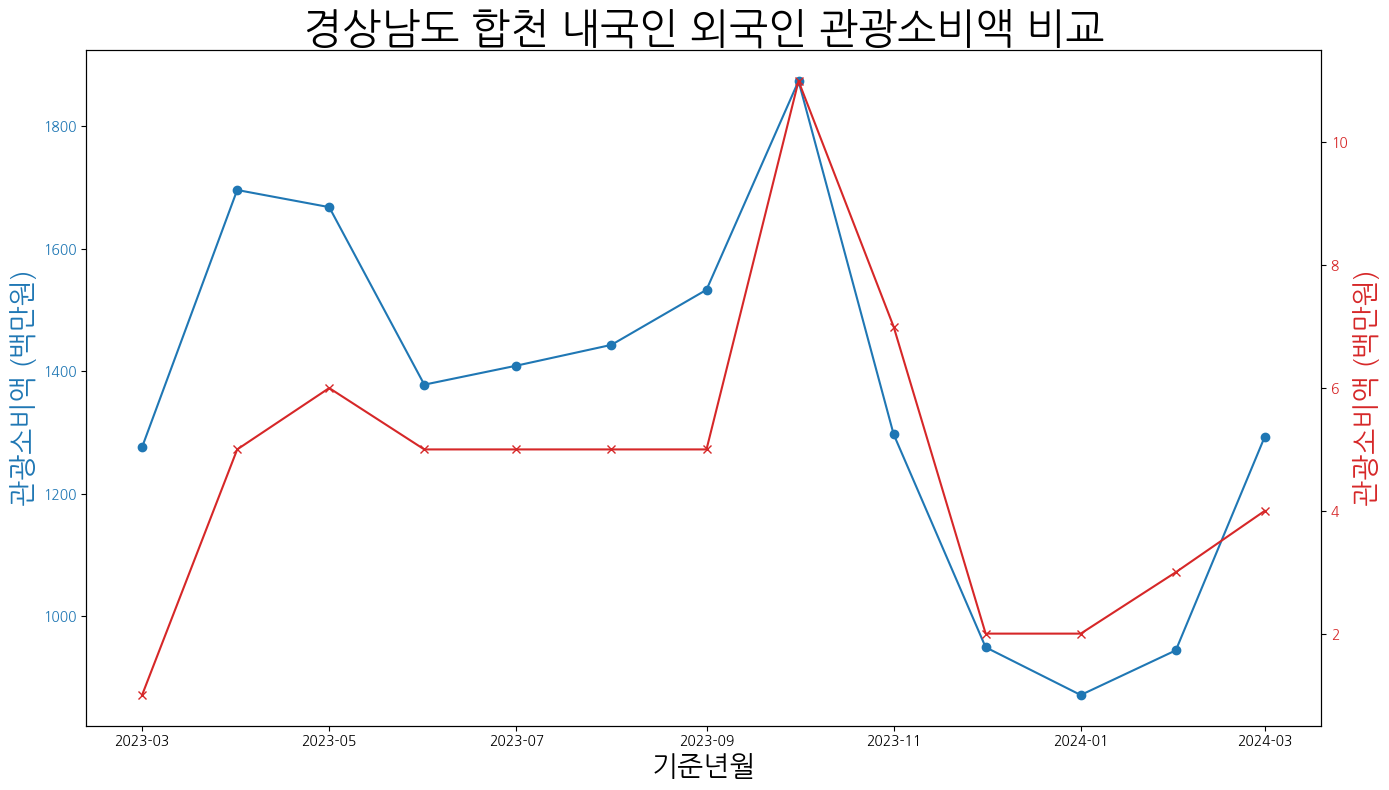

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size for the second plot (내국인)
plt.figure(figsize=(14, 8))

# Create the first plot for 관광소비액(백만원)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create the second y-axis to plot 합천 내국인 관광소비액(백만원)
ax1.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax1.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:blue')
ax1.plot(Comp4['기준년월'], Comp4['소비금 (백만원)'], color='tab:blue', label='합천 내국인 관광소비액(백만원)', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second y-axis to plot 합천 외국인 관광소비액(백만원)
ax2 = ax1.twinx()
ax2.set_xlabel('기준년월', fontsize=20, fontweight='bold')
ax2.set_ylabel('관광소비액 (백만원)', fontsize=20, fontweight='bold', color='tab:red')
ax2.plot(Comp5['기준년월'], Comp5['소비금 (백만원)'], color='tab:red', label='합천 외국인 관광소비액(백만원)', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set title with bold font and larger size
plt.title('경상남도 합천 내국인 외국인 관광소비액 비교', fontsize=30, fontweight='bold')

# Display the plot
fig.tight_layout()
plt.show()


## 경상남도 인구 감소율



In [ ]:
# 경상남도 인구 통계 csv

# 출처: https://jumin.mois.go.kr/

pop = pd.read_csv('/content/drive/MyDrive/Data/경상남도_연간_인구통계.csv',encoding='euc-kr')
pop = pd.DataFrame(pop)
pop.head()

,행정구역,2021년_총인구수,2021년_세대수,2021년_세대당 인구,2021년_남자 인구수,2021년_여자 인구수,2021년_남여 비율,2022년_총인구수,2022년_세대수,2022년_세대당 인구,2022년_남자 인구수,2022년_여자 인구수,2022년_남여 비율,2023년_총인구수,2023년_세대수,2023년_세대당 인구,2023년_남자 인구수,2023년_여자 인구수,2023년_남여 비율
0,경상남도 (4800000000),"3,314,183","1,505,971",2.20,"1,668,338","1,645,845",1.01,"3,280,493","1,516,930",2.16,"1,651,675","1,628,818",1.01,"3,251,158","1,525,502",2.13,"1,636,987","1,614,171",1.01
1,경상남도 경상남도 창원시 (4812000000),"1,032,741","451,940",2.29,"523,223","509,518",1.03,"1,021,487","456,191",2.24,"517,211","504,276",1.03,"1,009,038","456,830",2.21,"510,633","498,405",1.02
2,경상남도 경상남도 창원시 의창구 (4812100000),"218,027","95,630",2.28,"110,998","107,029",1.04,"215,823","96,712",2.23,"109,824","105,999",1.04,"213,342","96,997",2.20,"108,453","104,889",1.03
3,경상남도 경상남도 창원시 성산구 (4812300000),"251,562","105,052",2.39,"128,346","123,216",1.04,"248,512","106,194",2.34,"126,737","121,775",1.04,"245,259","106,216",2.31,"125,110","120,149",1.04
4,경상남도 경상남도 창원시 마산합포구 (4812500000),"181,322","84,087",2.16,"90,141","91,181",0.99,"179,496","84,722",2.12,"89,243","90,253",0.99,"179,394","85,763",2.09,"89,116","90,278",0.99


In [ ]:
# 경상남도 별로 2021년 부터 2023년 연간 인구수 비교
# 경상남도 별로 2021년 부터 2023년 연간 인구증가 감소 비교

Total_pop= pop[['행정구역','2021년_총인구수','2022년_총인구수','2023년_총인구수']]
Total_pop.head()


,행정구역,2021년_총인구수,2022년_총인구수,2023년_총인구수
0,경상남도 (4800000000),"3,314,183","3,280,493","3,251,158"
1,경상남도 경상남도 창원시 (4812000000),"1,032,741","1,021,487","1,009,038"
2,경상남도 경상남도 창원시 의창구 (4812100000),"218,027","215,823","213,342"
3,경상남도 경상남도 창원시 성산구 (4812300000),"251,562","248,512","245,259"
4,경상남도 경상남도 창원시 마산합포구 (4812500000),"181,322","179,496","179,394"


In [ ]:
Total_pop[['행정구역', '코드']] = Total_pop['행정구역'].str.split('(', n=1 ,expand=True)
# 코드 column 지우기
Total_pop = Total_pop.drop('코드', axis=1)
df = Total_pop[Total_pop['행정구역'] != '경상남도']

Total_pop.head()

<ipython-input-17-459426aa3e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_pop[['행정구역', '코드']] = Total_pop['행정구역'].str.split('(', n=1 ,expand=True)
<ipython-input-17-459426aa3e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Total_pop[['행정구역', '코드']] = Total_pop['행정구역'].str.split('(', n=1 ,expand=True)


,행정구역,2021년_총인구수,2022년_총인구수,2023년_총인구수
0,경상남도,"3,314,183","3,280,493","3,251,158"
1,경상남도 경상남도 창원시,"1,032,741","1,021,487","1,009,038"
2,경상남도 경상남도 창원시 의창구,"218,027","215,823","213,342"
3,경상남도 경상남도 창원시 성산구,"251,562","248,512","245,259"
4,경상남도 경상남도 창원시 마산합포구,"181,322","179,496","179,394"


In [ ]:
df= df.apply(lambda x: x.str.replace('경상남도 ', ''))  # '경상남도' 제거


In [ ]:
df['2022년_총인구수'] = df['2022년_총인구수'].str.replace(',', '').astype(int)
df['2023년_총인구수'] = df['2023년_총인구수'].str.replace(',', '').astype(int)
df['2022_2023년_인구증감가율'] = (df['2023년_총인구수'] - df['2022년_총인구수']) / df['2023년_총인구수']

In [ ]:
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df.head()

,행정구역,2021년_총인구수,2022년_총인구수,2023년_총인구수,2022_2023년_인구증감가율
0,,"3,314,183",3280493,3251158,-0.009023
1,창원시,"1,032,741",1021487,1009038,-0.012337
2,창원시 의창구,"218,027",215823,213342,-0.011629
3,창원시 성산구,"251,562",248512,245259,-0.013264
4,창원시 마산합포구,"181,322",179496,179394,-0.000569


In [ ]:
df = df.iloc[2:]

<ipython-input-25-10d62e9173f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot= sns.barplot(x =df['행정구역'],y = df['2022_2023년_인구증감가율'],data = df, palette='coolwarm', ax=ax, zorder=2)


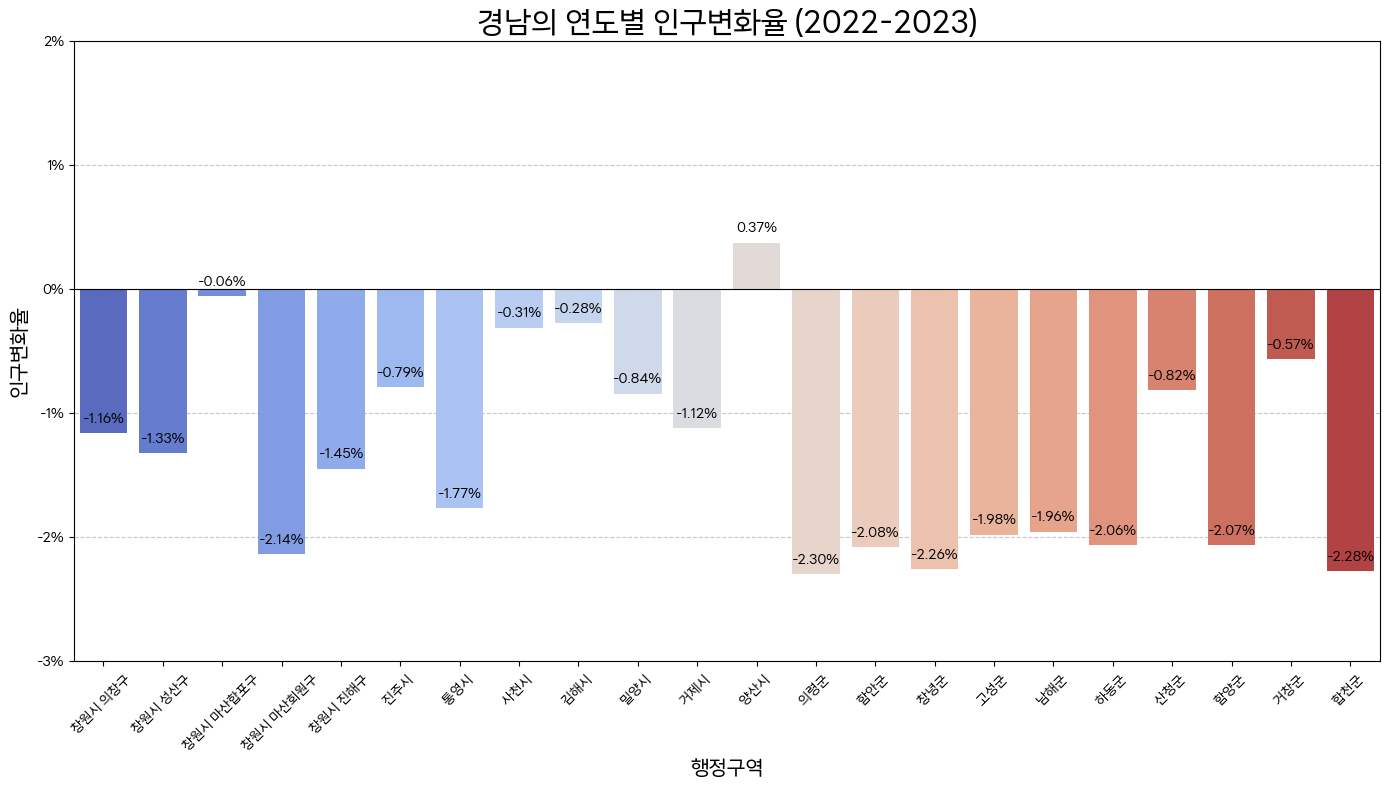

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

# 막대 그래프로 표시
barplot= sns.barplot(x =df['행정구역'],y = df['2022_2023년_인구증감가율'],data = df, palette='coolwarm', ax=ax, zorder=2)

# 축과 라벨 설정
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2%}',  # 표시할 텍스트 (퍼센트 형식)
                     (p.get_x() + p.get_width() / 2., height),  # 위치
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.8, zorder=3)


# Add gridlines with zorder behind bars
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)


plt.xlabel('행정구역',fontsize=15)
plt.ylabel('인구변화율',fontsize=15)
plt.title('경남의 연도별 인구변화율 (2022-2023)',fontsize=22)

# 그래프 출력
y_ticks = range(-3, 3, 1)
plt.yticks(ticks=[tick / 100 for tick in y_ticks], labels=[f'{tick}%' for tick in y_ticks])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

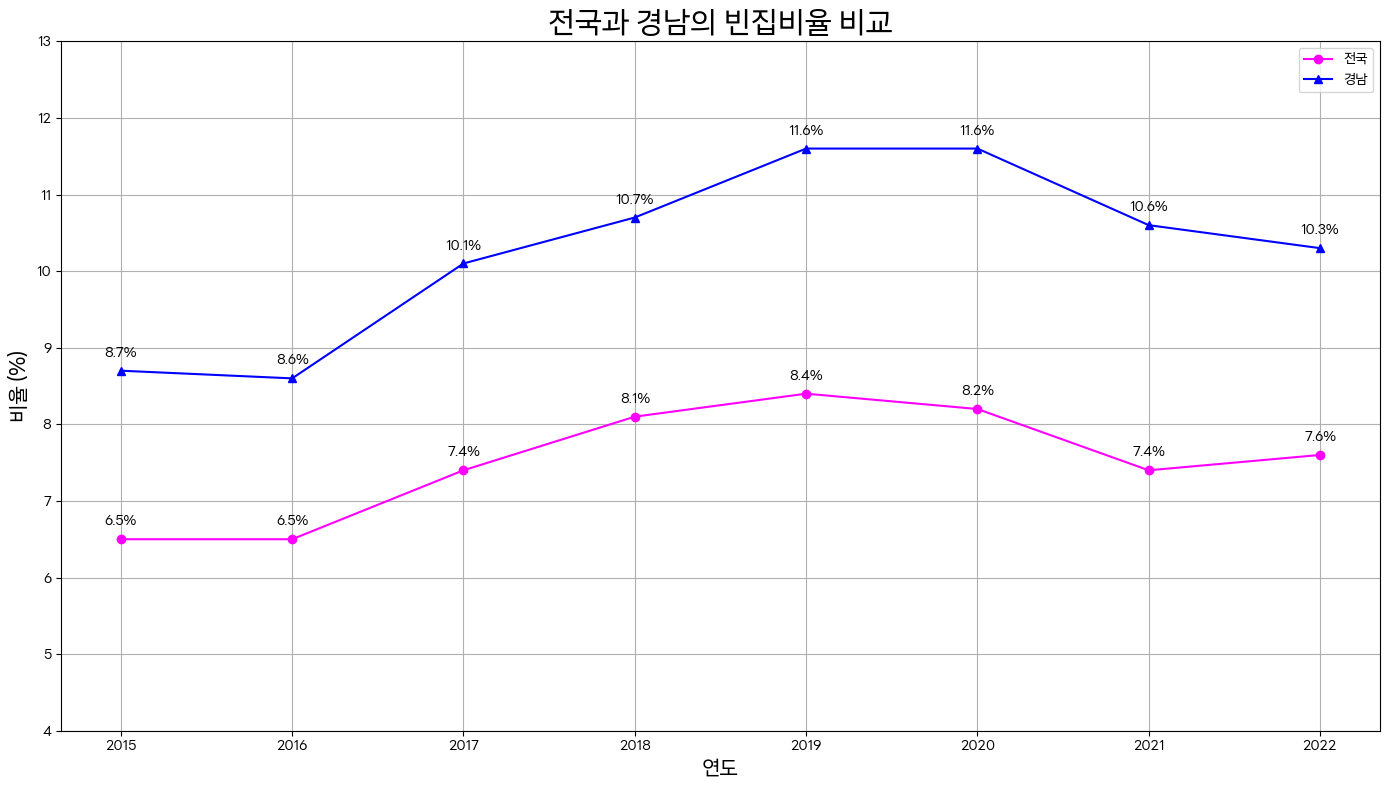

In [ ]:
# 데이터 준비
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
nationwide = [6.5, 6.5, 7.4, 8.1, 8.4, 8.2, 7.4, 7.6]
gyeongnam = [8.7, 8.6, 10.1, 10.7, 11.6, 11.6, 10.6, 10.3]

# 그래프 생성
plt.figure(figsize=(14, 8))

# 전국 데이터
plt.plot(years, nationwide, marker='o', color='magenta', label='전국')
for i, txt in enumerate(nationwide):
    plt.annotate(f'{txt}%', (years[i], nationwide[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 경남 데이터
plt.plot(years, gyeongnam, marker='^', color='blue', label='경남')
for i, txt in enumerate(gyeongnam):
    plt.annotate(f'{txt}%', (years[i], gyeongnam[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 축 및 제목 설정
plt.xlabel('연도', fontsize=15)
plt.ylabel('비율 (%)', fontsize=15)
plt.title('전국과 경남의 빈집비율 비교', fontsize=22)
plt.xticks(years)
plt.yticks(range(4, 14, 1))

# 범례 추가
plt.legend()

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.grid(True)
plt.show()

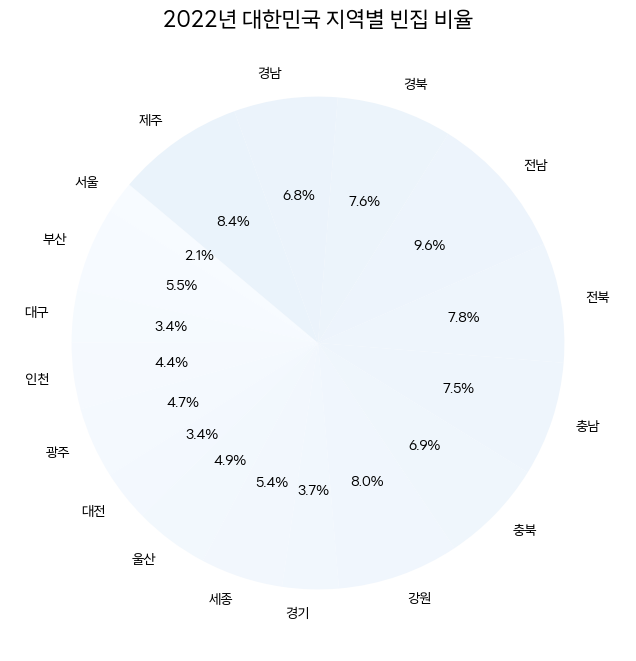

In [ ]:
# 데이터 준비
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']
vacancy_rates = [3.2, 8.4, 5.2, 6.6, 7.1, 5.1, 7.4, 8.2, 5.6, 12.1, 10.4, 11.4, 11.9, 14.5, 11.5, 10.3, 12.7]

# 원형 차트 생성
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(vacancy_rates, labels=regions, autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(range(len(regions))))

# 텍스트 설정
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')
    autotext.set_weight('bold')

# 제목 설정
plt.title('2022년 대한민국 지역별 빈집 비율', fontsize=16)

# 그래프 출력
plt.show()

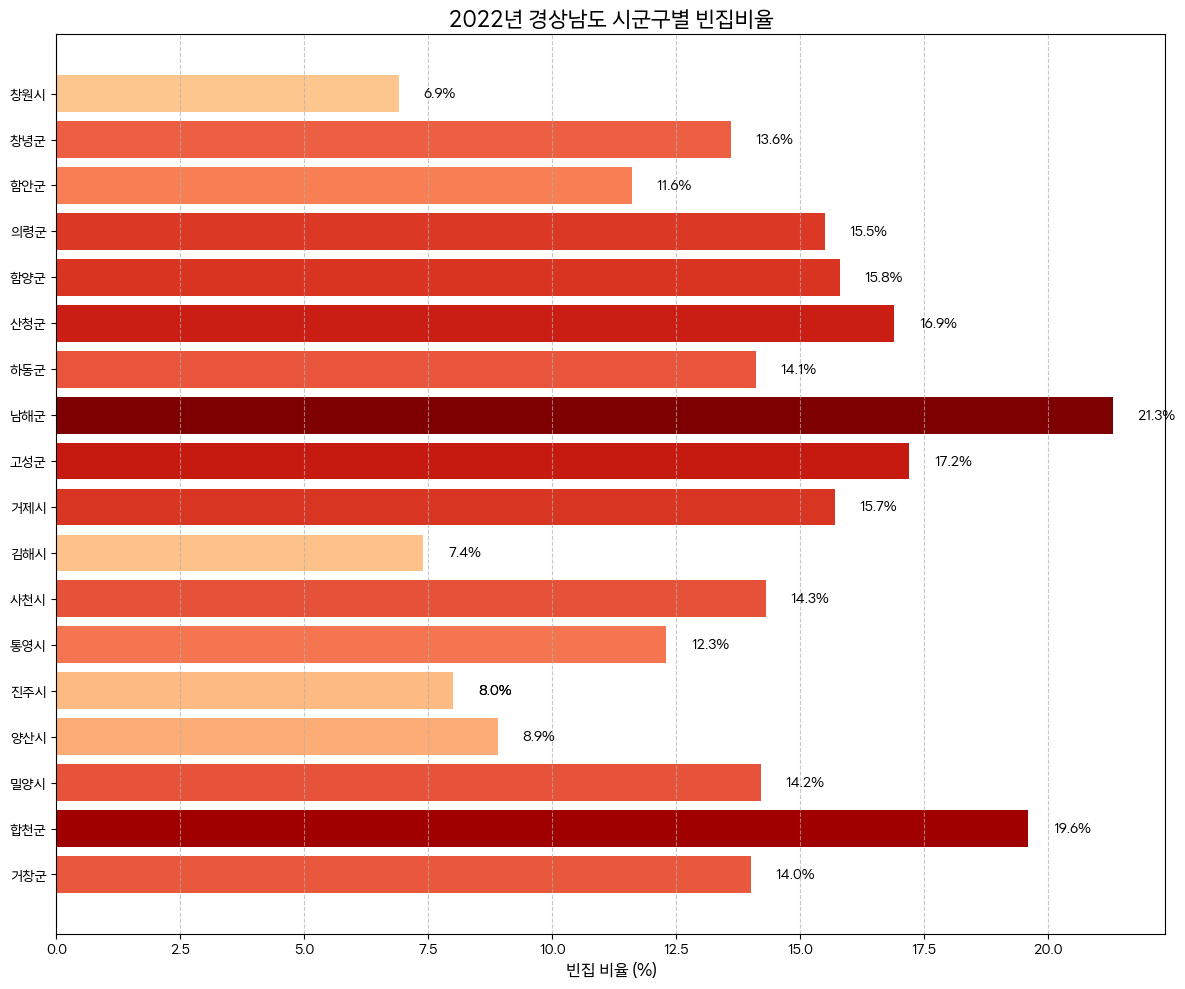

In [ ]:
# 데이터 준비
regions = ['거창군', '합천군', '밀양시', '양산시', '진주시', '통영시', '사천시', '김해시', '거제시', '고성군', '남해군', '하동군', '산청군', '함양군', '의령군', '함안군', '창녕군', '창원시', '진주시']
vacancy_rates = [14.0, 19.6, 14.2, 8.9, 8.0, 12.3, 14.3, 7.4, 15.7, 17.2, 21.3, 14.1, 16.9, 15.8, 15.5, 11.6, 13.6, 6.9, 8.0]

# 데이터 프레임 생성
df = pd.DataFrame({
    'region': regions,
    'vacancy_rate': vacancy_rates
})

# 색상 설정
colors = plt.cm.OrRd(df['vacancy_rate'] / max(df['vacancy_rate']))

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 10))
bars = ax.barh(df['region'], df['vacancy_rate'], color=colors)

# 각 막대에 값 표시
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.5
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', va='center')

# 축 및 제목 설정
ax.set_xlabel('빈집 비율 (%)', fontsize=12)
ax.set_title('2022년 경상남도 시군구별 빈집비율', fontsize=16)

# 시각적 요소 최적화
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 그래프 출력
plt.tight_layout()
plt.show()

## 2023년도 시군별 문화관광예산금액

In [ ]:
# 2023년도 시군별 문화관광예산금액,문화관광예산비율,1인당문화관광예산금액 (8,11,13)

Budget = pd.read_csv('/content/drive/MyDrive/Data/Budget.csv')
Budget  = pd.DataFrame(Budget)
Budget.head()

,SEQ_NO,FINAN_YEAR,ADMNSTMACH_CD,ADMNSTMACH_NM,TOT_ANEXPTR_BUDGET_PRICE,BEFORE_YEAR_ANEXPTR_BUDGET_PRICE,ANEXPTR_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_PRICE,BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE,CLTUR_TURSM_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_RATE,TOT_POPLTN_CO,ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE
0,1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
1,2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
2,3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
3,4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
4,5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0


In [ ]:
print(Budget.columns)

Index(['SEQ_NO', 'FINAN_YEAR', 'ADMNSTMACH_CD', 'ADMNSTMACH_NM',
       'TOT_ANEXPTR_BUDGET_PRICE', 'BEFORE_YEAR_ANEXPTR_BUDGET_PRICE',
       'ANEXPTR_BUDGET_IRDS_RT', 'CLTUR_TURSM_BUDGET_PRICE',
       'BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE', 'CLTUR_TURSM_BUDGET_IRDS_RT',
       'CLTUR_TURSM_BUDGET_RATE', 'TOT_POPLTN_CO',
       'ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE'],
      dtype='object')


In [ ]:
# 2023년도 경상남도 시군별 Column 8, 11, 13 추출 ( 문화관광예산금액,문화관광예산비율,1인당문화관광예산금액)


# Select specified columns to create Budget_2023 DataFrame
Budget_2023 = Budget[['SEQ_NO', 'FINAN_YEAR', 'ADMNSTMACH_CD', 'ADMNSTMACH_NM', 'CLTUR_TURSM_BUDGET_PRICE', 'CLTUR_TURSM_BUDGET_RATE', 'ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE']]

# Split 'ADMNSTMACH_NM' into '경상남' and '시군'
Budget_2023[['경상남', '시군']] = Budget_2023['ADMNSTMACH_NM'].apply(lambda x: pd.Series(x.split('도', 1)))

# 경상남도 시군별로만 사용함
Budget_2023 = Budget_2023[Budget_2023['경상남'] == '경상남']

# Display the head of the DataFrame
Budget_2023.head()

<ipython-input-64-e2a30bdb9e3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Budget_2023[['경상남', '시군']] = Budget_2023['ADMNSTMACH_NM'].apply(lambda x: pd.Series(x.split('도', 1)))
<ipython-input-64-e2a30bdb9e3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Budget_2023[['경상남', '시군']] = Budget_2023['ADMNSTMACH_NM'].apply(lambda x: pd.Series(x.split('도', 1)))


,SEQ_NO,FINAN_YEAR,ADMNSTMACH_CD,ADMNSTMACH_NM,CLTUR_TURSM_BUDGET_PRICE,CLTUR_TURSM_BUDGET_RATE,ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE,경상남,시군
223,224,2016,4800000000,경상남도,2.962200e+10,0.39,8780.0,경상남,
224,225,2016,4812000000,경상남도 창원시,6.717477e+09,0.25,6314.0,경상남,창원시
225,226,2016,4817000000,경상남도 진주시,1.394760e+09,0.13,4023.0,경상남,진주시
226,227,2016,4822000000,경상남도 통영시,4.875650e+08,0.10,3529.0,경상남,통영시
227,228,2016,4824000000,경상남도 사천시,7.273000e+08,0.13,6329.0,경상남,사천시


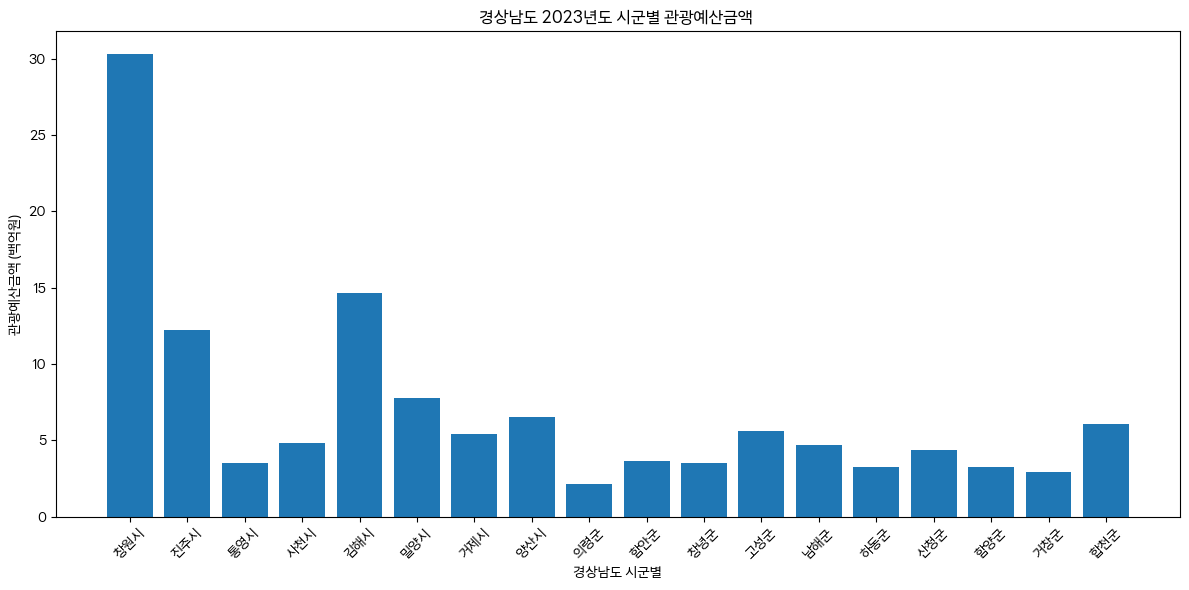

In [ ]:
# 경상남도 시군별 2023년도 관광예산금액
import pandas as pd
import matplotlib.pyplot as plt

Budget_2023['CLTUR_TURSM_BUDGET_PRICE'] = Budget_2023['CLTUR_TURSM_BUDGET_PRICE'] / 1e10

# Filter rows where SEQ_NO is between 1926 and 1946
filtered_budget = Budget_2023[(Budget_2023['SEQ_NO'] >= 1929) & (Budget_2023['SEQ_NO'] <= 1946)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(filtered_budget['시군'], filtered_budget['CLTUR_TURSM_BUDGET_PRICE'])
plt.xlabel('경상남도 시군별')
plt.ylabel('관광예산금액 (백억원)')
plt.title('경상남도 2023년도 시군별 관광예산금액 ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

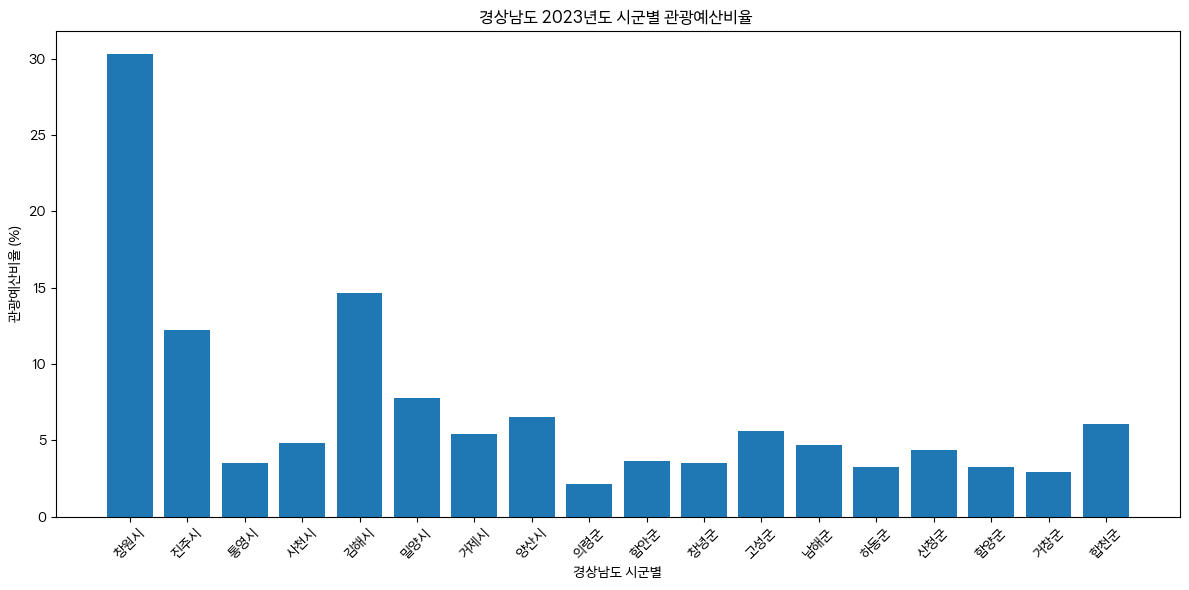

In [ ]:

# 100을 곱해서 가독성을 늘렸음

Budget_2023['CLTUR_TURSM_BUDGET_RATE'] = Budget_2023['CLTUR_TURSM_BUDGET_RATE'] * 100

# Filter rows where SEQ_NO is between 1926 and 1946
filtered_budget = Budget_2023[(Budget_2023['SEQ_NO'] >= 1929) & (Budget_2023['SEQ_NO'] <= 1946)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(filtered_budget['시군'], filtered_budget['CLTUR_TURSM_BUDGET_PRICE'])
plt.xlabel('경상남도 시군별')
plt.ylabel('관광예산비율 (%)')
plt.title('경상남도 2023년도 시군별 관광예산비율 ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

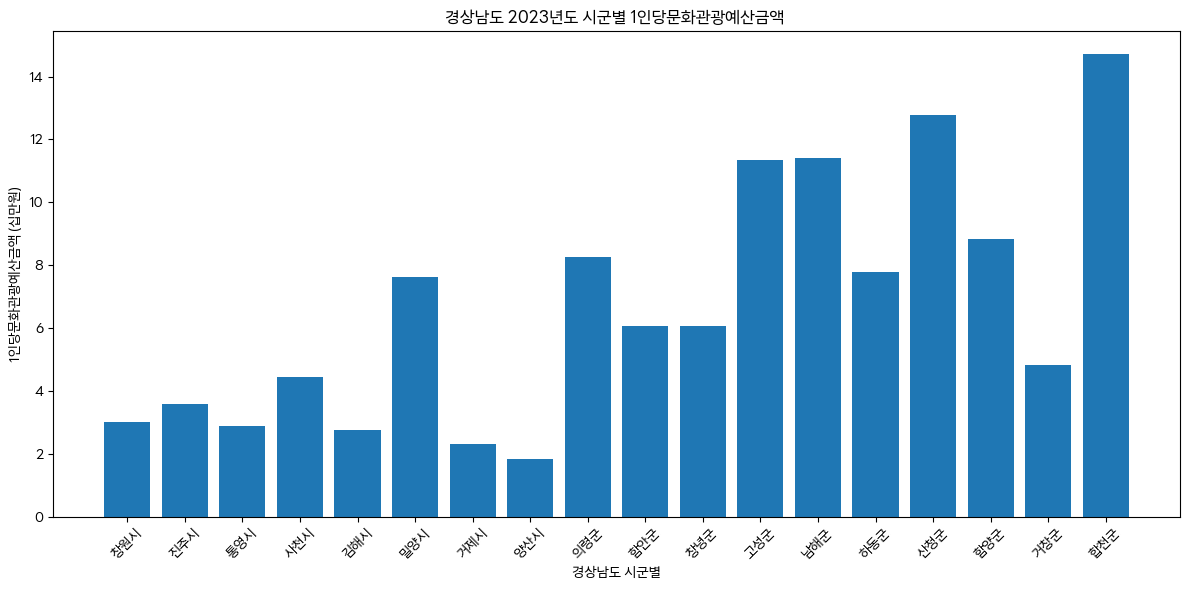

In [ ]:
#1인당문화관광예산금액

Budget_2023['ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE'] = Budget_2023['ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE']/1e5

# Filter rows where SEQ_NO is between 1926 and 1946
filtered_budget = Budget_2023[(Budget_2023['SEQ_NO'] >= 1929) & (Budget_2023['SEQ_NO'] <= 1946)]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(filtered_budget['시군'], filtered_budget['ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE'])
plt.xlabel('경상남도 시군별')
plt.ylabel('1인당문화관광예산금액 (십만원)')
plt.title('경상남도 2023년도 시군별 1인당문화관광예산금액 ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 경상남도 vs. 합천 관광객 수


In [ ]:
# 2019~2023년도까지 추이

# 경상남도 관광객 수 :  경상남도_연간추이.csv
# 경상남도 관광소비 추이: 경상남도_관광소비_추이_내국인 + 외국인.csv


# 합천군 관광객 수 : 합천군_방문자_추이.csv
# 합천군 관광지출액: 합천군_관광지출액.csv

In [ ]:
# 경상남도 관광객 수

Visitors_GS = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_연간추이.csv',encoding = 'CP949')
Visitors_GS = pd.DataFrame(Visitors_GS)
Visitors_GS.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019,153402255.0,148192769.0,3.5
1,2020,139231784.0,153402255.0,-9.2
2,2021,140277378.0,139231784.0,0.8
3,2022,150100212.0,140277378.0,7.0
4,2023,156243587.0,150100212.0,4.1


In [ ]:
# 합천군 관광객 수

Visitors_HC = pd.read_csv('/content/drive/MyDrive/EDA/합천군_방문자_추이.csv',encoding = 'CP949')
Visitors_HC = pd.DataFrame(Visitors_HC)
Visitors_HC.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019,6680696.0,6285338.0,6.3
1,2020,6470703.0,6680696.0,-3.1
2,2021,6798748.0,6470703.0,5.1
3,2022,7115326.0,6798748.0,4.7
4,2023,6923841.0,7115326.0,-2.7


In [ ]:
# 새로운 Dataframe 기준년월을 기준으로 경상남도 방문자수, 합천군 방문자수, 합천군 방문자 비율

Visitor = pd.merge(Visitors_GS, Visitors_HC, on='기준년월')
Visitor.head()


,기준년월,방문자수_x,전년동월방문자수_x,방문자수증감률_x,방문자수_y,전년동월방문자수_y,방문자수증감률_y
0,2019,153402255.0,148192769.0,3.5,6680696.0,6285338.0,6.3
1,2020,139231784.0,153402255.0,-9.2,6470703.0,6680696.0,-3.1
2,2021,140277378.0,139231784.0,0.8,6798748.0,6470703.0,5.1
3,2022,150100212.0,140277378.0,7.0,7115326.0,6798748.0,4.7
4,2023,156243587.0,150100212.0,4.1,6923841.0,7115326.0,-2.7


In [ ]:
# 경상남도 방문자 비율 계산

Visitor['ratio'] = (Visitor['방문자수_y'] / Visitor['방문자수_x']*100).round(2)
Visitor.head()

,기준년월,방문자수_x,전년동월방문자수_x,방문자수증감률_x,방문자수_y,전년동월방문자수_y,방문자수증감률_y,ratio
0,2019,153402255.0,148192769.0,3.5,6680696.0,6285338.0,6.3,4.36
1,2020,139231784.0,153402255.0,-9.2,6470703.0,6680696.0,-3.1,4.65
2,2021,140277378.0,139231784.0,0.8,6798748.0,6470703.0,5.1,4.85
3,2022,150100212.0,140277378.0,7.0,7115326.0,6798748.0,4.7,4.74
4,2023,156243587.0,150100212.0,4.1,6923841.0,7115326.0,-2.7,4.43


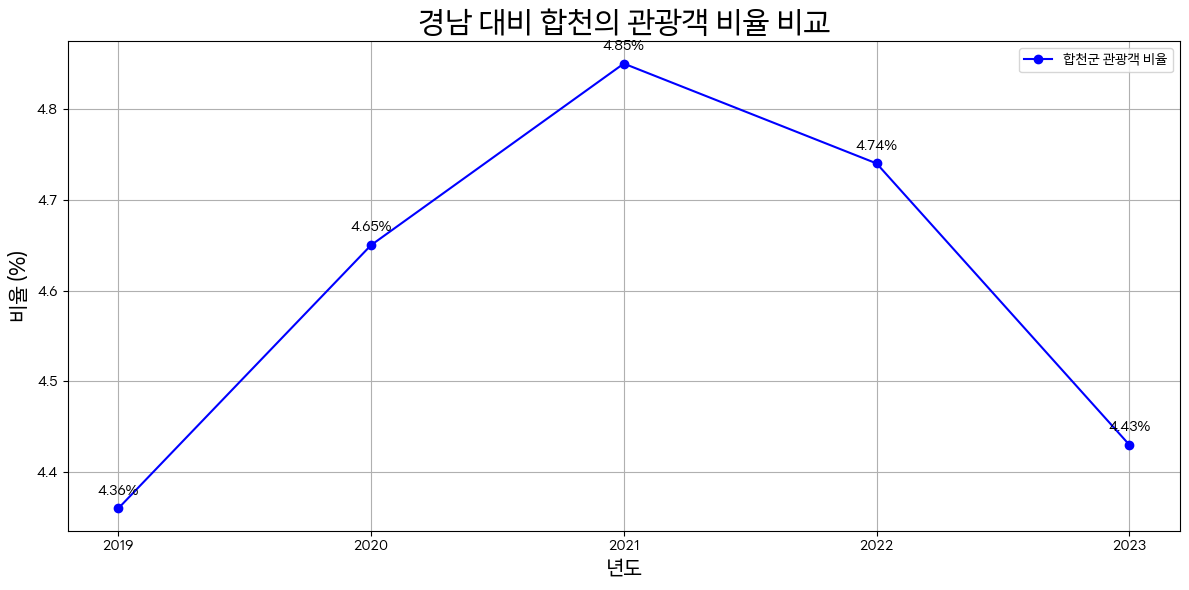

In [ ]:
# 경상남도 vs. 합천군 비율 그래프

# 경상남도 합천군 비율
plt.figure(figsize=(12, 6))
plt.plot(Visitor['기준년월'], Visitor['ratio'], marker='o', color='blue', label='합천군 관광객 비율')
for i, txt in enumerate(Visitor['ratio']):
    plt.annotate(f'{txt}%', (Visitor['기준년월'][i],Visitor['ratio'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# 축 및 제목 설정

plt.xlabel('년도', fontsize=15)
plt.ylabel('비율 (%)', fontsize=15)
plt.title('경남 대비 합천의 관광객 비율 비교', fontsize=22)
plt.xticks(Visitor['기준년월'])


# 범례 추가
plt.legend()

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
# 경상남도 관광소비 추이 내국인

Spend_D = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_관광소비_추이_내국인.csv',encoding = 'CP949')
Spend_D = pd.DataFrame(Spend_D)
Spend_D['기준년월'] = Spend_D['기준연월']
Spend_D.head()

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월
0,2019,경상남도,1543459.0,40701101.0,3.8,2019
1,2020,경상남도,1339949.0,32541445.0,4.1,2020
2,2021,경상남도,1316438.0,32770514.0,4.0,2021
3,2022,경상남도,1541915.0,40507642.0,3.8,2022
4,2023,경상남도,1573556.0,41920394.0,3.8,2023


In [ ]:
# 경상남도 관광소비 추이 외국인

Spend_D1 = pd.read_csv('/content/drive/MyDrive/EDA/경상남도_관광소비_추이_외국인.csv',encoding = 'CP949')
Spend_D1 = pd.DataFrame(Spend_D1)
Spend_D1['기준년월'] = Spend_D1['기준연월']
Spend_D1.head()

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월
0,2019,경상남도,39624.0,8455965.0,0.5,2019
1,2020,경상남도,19234.0,1621253.0,1.2,2020
2,2021,경상남도,18519.0,1152665.0,1.6,2021
3,2022,경상남도,25143.0,3186607.0,0.8,2022
4,2023,경상남도,38109.0,8027489.0,0.5,2023


In [ ]:
# 경상남도 합천 관광소비 추이 내국인

Spend_HC= pd.read_excel('/content/drive/MyDrive/EDA/합천군_관광지출액2.xlsx')
Spend_HC = pd.DataFrame(Spend_HC)
Spend_HC.head()

,기준년월,내국인 (백만원),외국인 (백만원)
0,2019,15109,32
1,2020,14391,21
2,2021,15839,21
3,2022,16564,41
4,2023,16370,53


In [ ]:
# 경상남도와 합천군 관광소비 금액 하나의 dataframe

Spend = pd.merge(Spend_D, Spend_HC, on='기준년월')
Spend.head()

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월,내국인 (백만원),외국인 (백만원)
0,2019,경상남도,1543459.0,40701101.0,3.8,2019,15109,32
1,2020,경상남도,1339949.0,32541445.0,4.1,2020,14391,21
2,2021,경상남도,1316438.0,32770514.0,4.0,2021,15839,21
3,2022,경상남도,1541915.0,40507642.0,3.8,2022,16564,41
4,2023,경상남도,1573556.0,41920394.0,3.8,2023,16370,53


In [ ]:
# 경상남도 대비 합천군 관광소비액 비율


Spend['ratio'] = (Spend['내국인 (백만원)'] / Spend['관광소비액(백만원)']*100).round(2)
Spend.head()


,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월,내국인 (백만원),외국인 (백만원),ratio
0,2019,경상남도,1543459.0,40701101.0,3.8,2019,15109,32,0.98
1,2020,경상남도,1339949.0,32541445.0,4.1,2020,14391,21,1.07
2,2021,경상남도,1316438.0,32770514.0,4.0,2021,15839,21,1.20
3,2022,경상남도,1541915.0,40507642.0,3.8,2022,16564,41,1.07
4,2023,경상남도,1573556.0,41920394.0,3.8,2023,16370,53,1.04


In [ ]:
# 경상남도와 합천군 관광소비 금액 하나의 dataframe 외국인

Spend_0 = pd.merge(Spend_D1, Spend_HC, on='기준년월')
Spend_0.head()

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월,내국인 (백만원),외국인 (백만원)
0,2019,경상남도,39624.0,8455965.0,0.5,2019,15109,32
1,2020,경상남도,19234.0,1621253.0,1.2,2020,14391,21
2,2021,경상남도,18519.0,1152665.0,1.6,2021,15839,21
3,2022,경상남도,25143.0,3186607.0,0.8,2022,16564,41
4,2023,경상남도,38109.0,8027489.0,0.5,2023,16370,53


In [ ]:
# 외국인 합천군 관광소비금액 비율

Spend_0['ratio_1'] = (Spend_0['외국인 (백만원)'] / Spend_0['관광소비액(백만원)']*100).round(2)
Spend_0.head()

,기준연월,지역명,관광소비액(백만원),전국 관광소비액(백만원),전국 대비 관광소비율,기준년월,내국인 (백만원),외국인 (백만원),ratio_1
0,2019,경상남도,39624.0,8455965.0,0.5,2019,15109,32,0.08
1,2020,경상남도,19234.0,1621253.0,1.2,2020,14391,21,0.11
2,2021,경상남도,18519.0,1152665.0,1.6,2021,15839,21,0.11
3,2022,경상남도,25143.0,3186607.0,0.8,2022,16564,41,0.16
4,2023,경상남도,38109.0,8027489.0,0.5,2023,16370,53,0.14


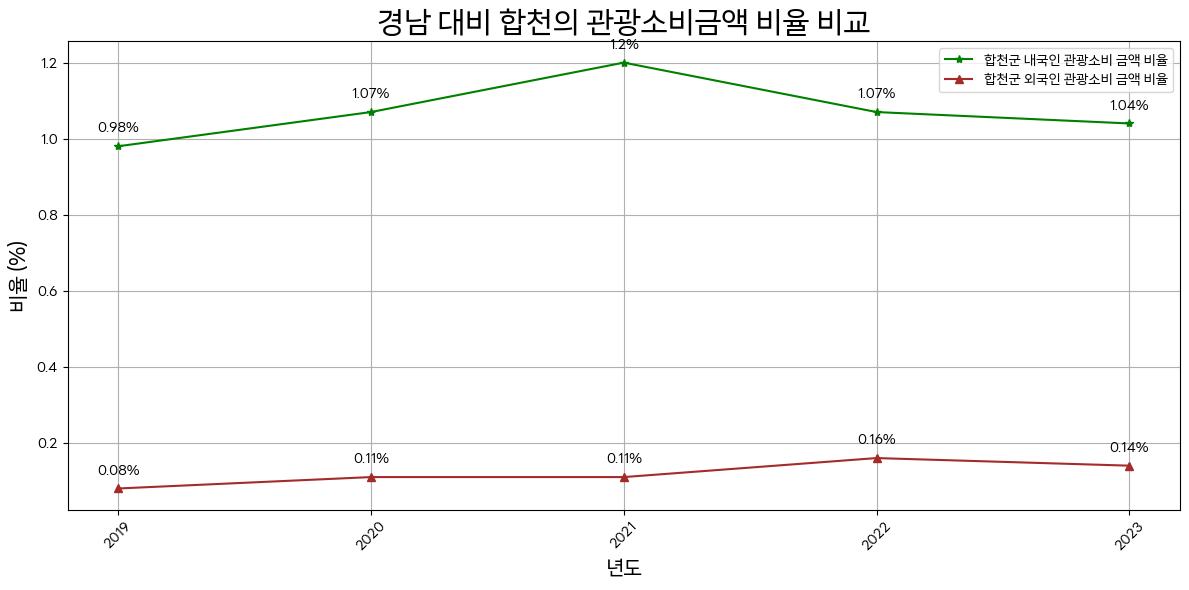

In [ ]:
import matplotlib.pyplot as plt

# Assuming Spend DataFrame is already defined and has '기준년월' and 'ratio' columns
plt.figure(figsize=(12, 6))
plt.plot(Spend['기준년월'], Spend['ratio'], color='green', marker = '*',label='합천군 내국인 관광소비 금액 비율')

# Annotate the bar chart
for i, txt in enumerate(Spend['ratio']):
    plt.annotate(f'{txt}%', (Spend['기준년월'][i], Spend['ratio'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(Spend_0['기준년월'], Spend_0['ratio_1'], color='brown', marker = '^',label='합천군 외국인 관광소비 금액 비율')
# Annotate the bar chart
for i, txt in enumerate( Spend_0['ratio_1']):
    plt.annotate(f'{txt}%', (Spend_0['기준년월'][i], Spend_0['ratio_1'][i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set axis labels and title
plt.xlabel('년도', fontsize=15)
plt.ylabel('비율 (%)', fontsize=15)
plt.title('경남 대비 합천의 관광소비금액 비율 비교', fontsize=22)
plt.xticks(Spend['기준년월'], rotation=45)  # Rotate x-axis labels if needed

# Add legend
plt.legend()

# Adjust layout and show grid
plt.tight_layout()
plt.grid(True)
plt.show()
